
    
# Analyse des données du coeur SPECTF

#### Sources :

Les propriétaires d'origine : Krzysztof J. DSI , Lukasz Kurgan A.
Université du Colorado à Denver , Denver , CO 80217 , USA, Krys.Cios @ cudenver.edu
Lucy S. Goodenday
Medical College of Ohio , OH , U.S.A.
- Les bailleurs de fonds : Lukasz A.Kurgan , Krzysztof J. DSI
- Date: 10/01/01
Description :
SPECTF est une bonne base de données pour tester les algorithmes d’apprentissage. Elle est composée de
267 exemples décrits par 45 attributs. Attribut prédit : OVERALL_DIAGNOSIS (binaire). L'ensemble des
données décrit le diagnostic d’images cardiaques du « Single Proton Emission Computed Tomography »
(SPECT). Chacun des patients est classé en deux catégories : normal et anormal. La base des données de
267 séries d'images SPECT (patients) a été traitée pour extraire des caractéristiques qui résument les
images SPECT originales.
En conséquence, 44 motifs caractéristiques en continu ont été créés pour chaque patient. L'algorithme de
CLIP3 a été utilisé pour générer des règles de classification à partir de ces schémas. L'algorithme de CLIP3
généré règles qui étaient de 77% de précision (par rapport à des diagnostics de cardiologues).
Nombre d'instances : 267
Nombre d'attributs : 45 (44 en continu + 1 classe binaire )
L’ensemble de données est divisé en :
- Base d’apprentissage (« SPECTF.train » 80 instances)
- Base de test (« SPECTF.test « 187 cas )
La distribution des classes :
    - Ensemble des données
    - Ensemble des données d’apprentissage
    - Ensemble des données de test
    


Ce projet est différent des autres projets car le type de données est différent car il s'agit ici d'utiliser les données d'apprentissage et de test pour modéliser le problème alors que dans les autres projets la type de données est différent.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.decomposition import PCA # analyse composantes principales
from sklearn.preprocessing import StandardScaler # diminer taille vecteur
from sklearn.metrics import classification_report,confusion_matrix # score model

In [2]:
echant_test = pd.read_csv("SPECTF_test.csv")
echant_train = pd.read_csv("SPECTF_train.csv")

In [3]:
# On vérifie nos données s'il n'y a pas d'incohérences ou erreurs

print(echant_test.info())
print(echant_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   OVERALL_DIAGNOSIS  187 non-null    int64
 1   f1                 187 non-null    int64
 2   f2                 187 non-null    int64
 3   f3                 187 non-null    int64
 4   f4                 187 non-null    int64
 5   f5                 187 non-null    int64
 6   f6                 187 non-null    int64
 7   f7                 187 non-null    int64
 8   f8                 187 non-null    int64
 9   f9                 187 non-null    int64
 10  f10                187 non-null    int64
 11  f11                187 non-null    int64
 12  f12                187 non-null    int64
 13  f13                187 non-null    int64
 14  f14                187 non-null    int64
 15  f15                187 non-null    int64
 16  f16                187 non-null    int64
 17  f17             

In [4]:
print(echant_test)

     OVERALL_DIAGNOSIS  f1  f2  f3  f4  f5  f6  f7  f8  f9  ...  f35  f36  \
0                    1  67  68  73  78  65  63  67  60  63  ...   61   56   
1                    1  75  74  71  71  62  58  70  64  71  ...   66   62   
2                    1  83  64  66  67  67  74  74  72  64  ...   67   64   
3                    1  72  66  65  65  64  61  71  78  73  ...   69   68   
4                    1  62  60  69  61  63  63  70  68  70  ...   66   66   
..                 ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...   
182                  0  74  69  75  70  70  74  77  77  65  ...   66   67   
183                  0  72  61  64  66  64  59  68  66  76  ...   69   64   
184                  0  75  73  72  77  68  67  76  73  67  ...   70   67   
185                  0  59  62  72  74  66  66  74  76  63  ...   65   71   
186                  0  64  66  68  71  62  64  74  73  63  ...   70   69   

     f37  f38  f39  f40  f41  f42  f43  f44  
0     76   75   74   77   76 

In [5]:
# Pas de valeurs nulles ou valeurs manquantes 

print("Nombre de variables et de patients pour les deux échantillons: \n")
print(echant_test.shape)
print(echant_test.shape)


# On doit avoir les mêmes dimensions normalement (c'est logique car ces deux échantillons correspondent 
# à des données d'apprentissage et de test)


Nombre de variables et de patients pour les deux échantillons: 

(187, 45)
(187, 45)


On a bien 186 patients ou cas et 45 variables ou features (comme sur l'énoncé).
On passe à la partie de modélisation des données. On va s'intéresser à des modèles qu'on a vu en cours, à savoir, le modèle de régression logistique. On pourra avant voir le résulat d'analyse en composantes principales pour diminuer le nombre de variables (comme en cours).

## PCA

In [27]:
pca = PCA(n_components=45)
pca.fit(echant_train)
x_pca = pca.transform(echant_test)

Text(0.5, 1.0, 'Analyse en composantes principales')

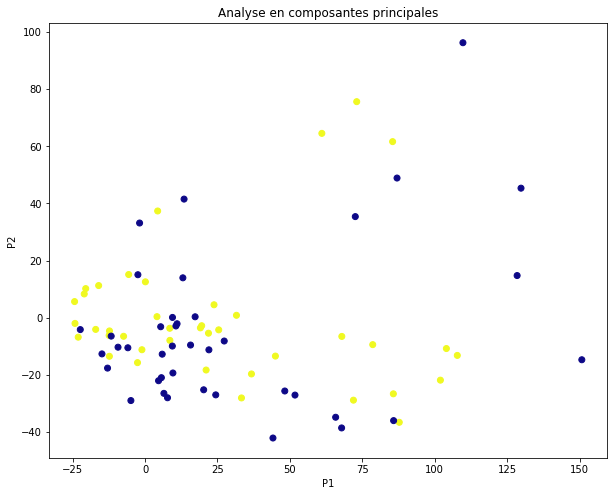

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=echant_train['OVERALL_DIAGNOSIS']+echant_test['OVERALL_DIAGNOSIS'],cmap='plasma')
plt.xlabel('P1')
plt.ylabel('P2')
plt.title('Analyse en composantes principales')


Text(0.5, 1.0, 'Variance cumulée en fonction du nombre de composantes')

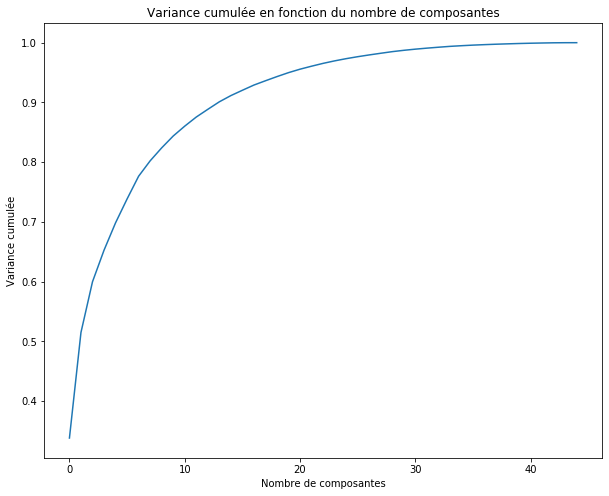

In [29]:
# Regardons combien de variables peut on supprimer ?

plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée')
plt.title("Variance cumulée en fonction du nombre de composantes")

On remarque que quand la variance est à 95%, le nombre de composantes qu'on peut atteindre est 20 variables.


### Régression logistique 

La régression logistique ou modèle logit est un modèle de régression binomiale. Comme pour tous les modèles de régression binomiale, il s'agit de modéliser au mieux un modèle mathématique simple à des observations réelles nombreuses. En d'autres termes d'associer à un vecteur de variables aléatoires <code>(x1,...x2)</code> une variable aléatoire binomiale génériquement notée <code>y</code>. La régression logistique constitue un cas particulier de modèle linéaire généralisé.




In [19]:
# On effectue les étapes classiques de séparation de données pour le test et l'apprentissage

from sklearn.linear_model import LogisticRegression

X_train = echant_train.drop('OVERALL_DIAGNOSIS',axis=1)
y_train = echant_train['OVERALL_DIAGNOSIS']
X_test = echant_test.drop('OVERALL_DIAGNOSIS',axis=1)
y_test = echant_test['OVERALL_DIAGNOSIS']

# Pour éviter l'erreur du nombre d'itérations limit atteint, on scale le vecteur X_train
standardized = StandardScaler()
standardized.fit(X_train)
X_scaled_train = standardized.transform(X_train)

regression = LogisticRegression()
regression.fit(X_scaled_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# On peut afficher le score du modèle et le résultat du modèle finalement 

pred = regression.predict(X_test)
matrice_confusion = confusion_matrix(y_test,pred)

precision = metrics.accuracy_score(pred,y_test)

print(matrice_confusion)

[[ 15   0]
 [172   0]]


La matrice de confusion correspond aux résultats qu'on a à la fin d'un modèle d'un apprentissage. 172 diagnostics positives et 15 négatives et 0% d'erreur car on a pris les données. On a pas généré des données au hasard car ça semble compliqué. Apparemment, il faut générer un autre modèle RandomSearch mais on a pas fait ça en cours donc je ne traiterai pas ce modèle ici.
